In [45]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.remove_shortcut('up');
Jupyter.keyboard_manager.command_shortcuts.remove_shortcut('down');

<IPython.core.display.Javascript object>

In [30]:
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [36]:
stock = pd.read_csv("GOOG.csv",header=None)
stock.columns = ['date','price'] #changing the names of the columns

In [42]:
stock['date'] = pd.to_datetime(stock['date'])  #convert the Pandas DataFrame into a time series with daily frequency
indexed_stock = stock.set_index('date') #setting date as index for the pandas dataframe

In [49]:
stock.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [43]:
#converting dataframe to panda series with time as index and values as the price of the stock
ts = indexed_stock['price']
ts.head(5)

date
2017-07-01     930.500000
2017-08-01     939.330017
2017-09-01     959.109985
2017-10-01    1016.640015
2017-11-01    1021.409973
Name: price, dtype: float64

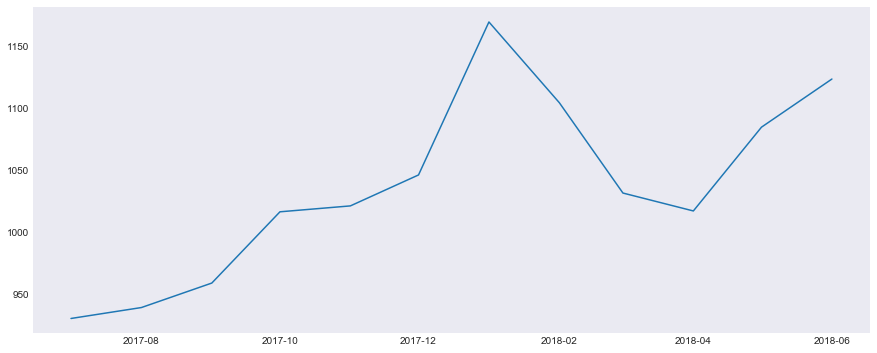

In [48]:
#Visualize the time series
plt.plot(ts)
plt.savefig('ts.jpg')


In [53]:
oo = stock.as_matrix()

In [55]:
oo.shape

(12, 2)

In [59]:
oo[1].dtype

dtype('O')

In [63]:
oo[:1]

array([[Timestamp('2017-07-01 00:00:00'), 930.5]], dtype=object)

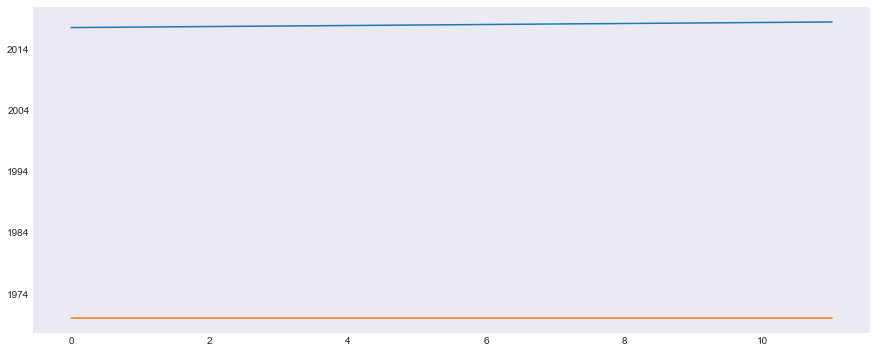

In [69]:
plt.plot(oo)

In [70]:
oo

array([[Timestamp('2017-07-01 00:00:00'), 930.5],
       [Timestamp('2017-08-01 00:00:00'), 939.330017],
       [Timestamp('2017-09-01 00:00:00'), 959.1099849999999],
       [Timestamp('2017-10-01 00:00:00'), 1016.6400150000001],
       [Timestamp('2017-11-01 00:00:00'), 1021.409973],
       [Timestamp('2017-12-01 00:00:00'), 1046.400024],
       [Timestamp('2018-01-01 00:00:00'), 1169.939941],
       [Timestamp('2018-02-01 00:00:00'), 1104.72998],
       [Timestamp('2018-03-01 00:00:00'), 1031.790039],
       [Timestamp('2018-04-01 00:00:00'), 1017.330017],
       [Timestamp('2018-05-01 00:00:00'), 1084.98999],
       [Timestamp('2018-06-01 00:00:00'), 1123.859985]], dtype=object)